In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import textstat
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")
import numpy as np

file_c = './data/datascraping/conspiracy_raw_pushshift_data.csv'
file_c_reddit = './data/datascraping/conspiracy_raw_redditapi_data.csv'
file_c_filt = './data/preprocessed/conspiracy_preprocessed_filtered.csv'

df_c = pd.read_csv(file_c)
df_c_reddit = pd.read_csv(file_c_reddit)
df_c_filt = pd.read_csv(file_c_filt)
df_c_filt = df_c_filt.merge(df_c_reddit, how='left', on='id')

file_u = './data/datascraping/ukraine_raw_pushshift_data.csv'
file_u_reddit = './data/datascraping/ukraine_raw_redditapi_data.csv'
file_u_filt = './data/preprocessed/ukraine_preprocessed_filtered.csv'

df_u = pd.read_csv(file_u)
df_u_reddit = pd.read_csv(file_u_reddit)
df_u_filt = pd.read_csv(file_u_filt)
df_u_filt = df_u_filt.merge(df_u_reddit, how='left', on='id')


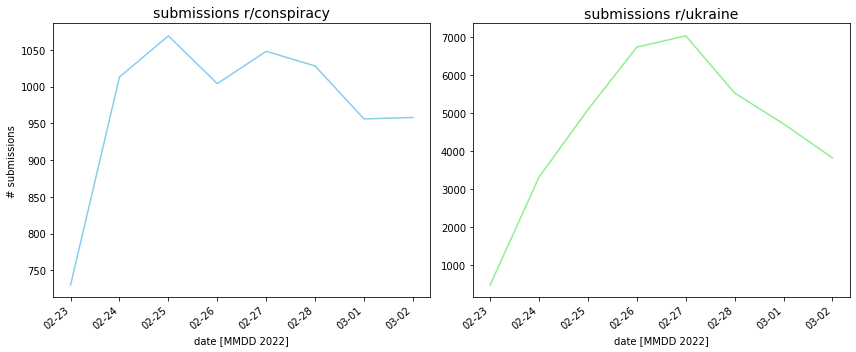

In [66]:
fig, ax = plt.subplots(1, 2, figsize=(12,5))
ax = ax.ravel()

df_c['date'] = df_c['created_utc'].apply(datetime.fromtimestamp)
time_c = df_c.groupby(pd.Grouper(key='date', axis=0, freq='D')).size()
sns.lineplot(x=time_c.index, y=time_c.values, color='skyblue', ax = ax[0])
ax[0].set_xticklabels(time_c.index.strftime('%m-%d'), rotation=40, ha='right')
ax[0].set(xlabel='date [MMDD 2022]', ylabel='# submissions')
ax[0].set_title(f'submissions r/conspiracy', fontsize=14)

df_u['date'] = df_u['created_utc'].apply(datetime.fromtimestamp)
time_u = df_u.groupby(pd.Grouper(key='date', axis=0, freq='D')).size()
sns.lineplot(x=time_u.index, y=time_u.values, color='lightgreen', ax = ax[1])
ax[1].set_xticklabels(time_u.index.strftime('%m-%d'), rotation=40, ha='right')
ax[1].set(xlabel='date [MMDD 2022]')
ax[1].set_title(f'submissions r/ukraine', fontsize=14)

plt.tight_layout()
plt.savefig("./images/submission_date.png")

In [67]:
df_u_del = df_u_reddit[df_u_reddit['self_text'].isin(["[deleted]", "[removed]"]) | df_u_reddit["title"].isin(["[deleted by user]"])]
df_c_del = df_deleted = df_c_reddit[df_c_reddit['self_text'].isin(["[deleted]", "[removed]"]) | df_c_reddit["title"].isin(["[deleted by user]"])]

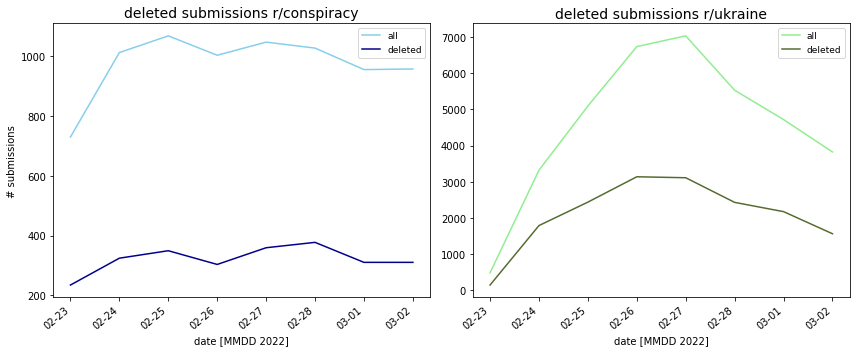

In [68]:
fig, ax = plt.subplots(1, 2, figsize=(12,5))
ax = ax.ravel()

df_c['date'] = df_c['created_utc'].apply(datetime.fromtimestamp)
time_c = df_c.groupby(pd.Grouper(key='date', axis=0, freq='D')).size()
df_c_del['date'] = df_c_del['time'].apply(datetime.fromtimestamp)
time_c_del = df_c_del.groupby(pd.Grouper(key='date', axis=0, freq='D')).size()

sns.lineplot(x=time_c.index, y=time_c.values, color='skyblue', ax = ax[0])
sns.lineplot(x=time_c_del.index, y=time_c_del.values, color='darkblue', ax = ax[0])
ax[0].set_xticklabels(time_c.index.strftime('%m-%d'), rotation=40, ha='right')
ax[0].set(xlabel='date [MMDD 2022]', ylabel='# submissions')
ax[0].set_title(f'deleted submissions r/conspiracy', fontsize=14)
legend = ax[0].legend(labels=['all', 'deleted'], fontsize=9)
legend.get_title().set_fontsize('9')

df_u['date'] = df_u['created_utc'].apply(datetime.fromtimestamp)
time_u = df_u.groupby(pd.Grouper(key='date', axis=0, freq='D')).size()
df_u_del['date'] = df_u_del['time'].apply(datetime.fromtimestamp)
time_u_del = df_u_del.groupby(pd.Grouper(key='date', axis=0, freq='D')).size()

sns.lineplot(x=time_u.index, y=time_u.values, color='lightgreen', ax = ax[1])
sns.lineplot(x=time_u_del.index, y=time_u_del.values, color='darkolivegreen', ax = ax[1])
ax[1].set_xticklabels(time_u.index.strftime('%m-%d'), rotation=40, ha='right')
ax[1].set(xlabel='date [MMDD 2022]')
ax[1].set_title(f'deleted submissions r/ukraine', fontsize=14)
legend = ax[1].legend(labels=['all', 'deleted'], fontsize=9)
legend.get_title().set_fontsize('9')

plt.tight_layout()
plt.savefig("./images/submission_date.png")

mean r/conspiracy: 0.67
mean r/ukraine: 0.87


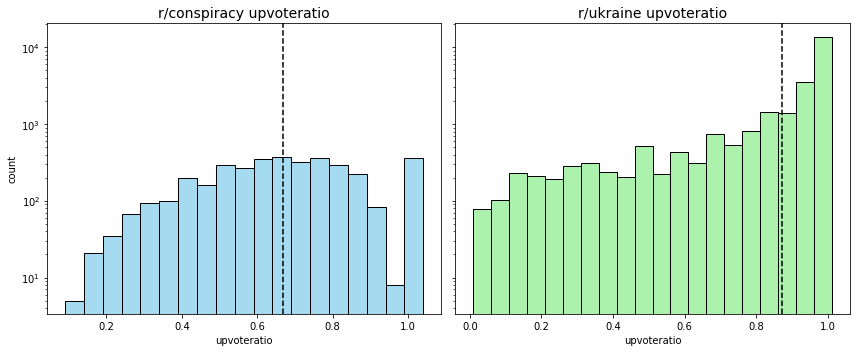

In [69]:
fig, ax = plt.subplots(1, 2, figsize=(12,5), sharey=True)
ax = ax.ravel()

mean_c = df_c_filt['upvoteratio'].mean()
sns.histplot(data=df_c_filt, x='upvoteratio', ax = ax[0], binwidth=0.05, color='skyblue')
ax[0].set_title('r/conspiracy upvoteratio', fontsize=14)
ax[0].axvline(mean_c, ls='--', color='black')
ax[0].set(ylabel='count')

mean_u = df_u_filt['upvoteratio'].mean()
sns.histplot(data=df_u_filt, x='upvoteratio', ax = ax[1], binwidth=0.05, color="lightgreen")
ax[1].set_title('r/ukraine upvoteratio', fontsize=14)
ax[1].axvline(mean_u, ls='--', color='black')

plt.yscale('log')
plt.tight_layout()
plt.savefig("./images/upvoteratio.png")

print(f"mean r/conspiracy: {round(mean_c, 2)}")
print(f"mean r/ukraine: {round(mean_u, 2)}")

Text(0.5, 1.0, 'upvoteratio')

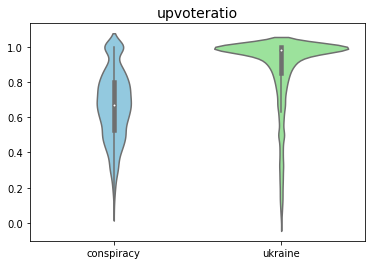

In [70]:
ax = sns.violinplot(data=[df_c_filt['upvoteratio'], df_u_filt['upvoteratio']], palette=["skyblue", "lightgreen"])
ax.set_xticklabels(['conspiracy','ukraine'])
ax.set_title("upvoteratio", fontsize=14)

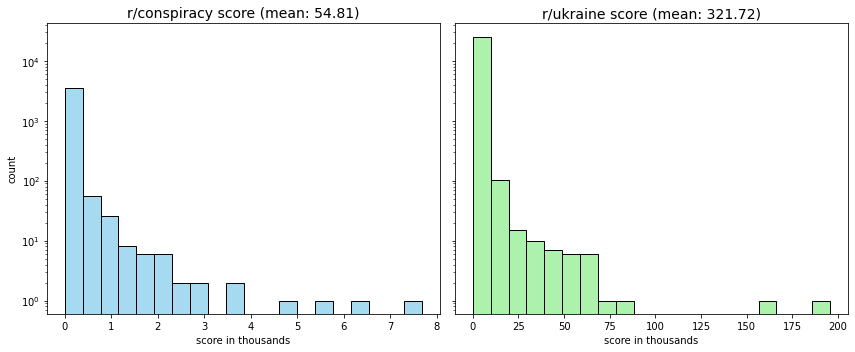

In [71]:
fig, ax = plt.subplots(1, 2, figsize=(12,5), sharey=True)
ax = ax.ravel()

mean_c = df_c_filt['score_y'].mean()
sns.histplot(data=df_c_filt, x='score_y', ax = ax[0], bins=20, color='skyblue')
ax[0].set_title(f'r/conspiracy score (mean: {round(mean_c, 2)})', fontsize=14)
ax[0].set_xticklabels(np.arange(-1,9))
ax[0].set_xlabel("score in thousands")
ax[0].set(ylabel='count')

mean_u = df_u_filt['score_y'].mean()
g_ukraine = sns.histplot(data=df_u_filt, x='score_y', ax = ax[1], bins=20, color="lightgreen")
g_ukraine.set_title(f'r/ukraine score (mean: {round(mean_u, 2)})', fontsize=14)
g_ukraine.set_xticklabels(np.arange(-25,201,25))
g_ukraine.set_xlabel("score in thousands")

plt.yscale('log')
plt.tight_layout()
plt.savefig("./images/scores.png")

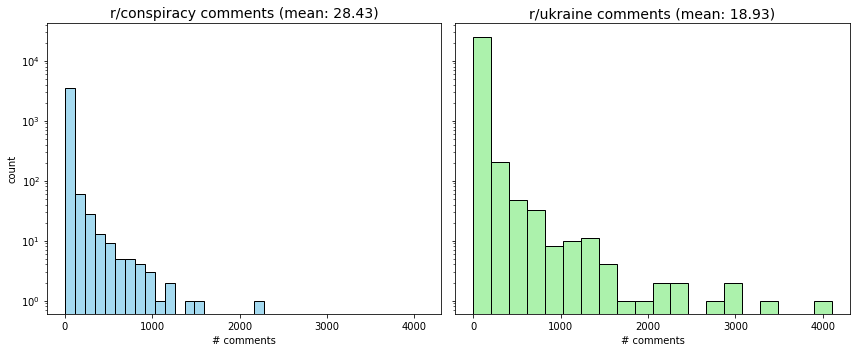

In [72]:
fig, ax = plt.subplots(1, 2, figsize=(12,5), sharey=True, sharex=True)
ax = ax.ravel()

mean_c = df_c_filt['num_comments_y'].mean()
sns.histplot(data=df_c_filt, x='num_comments_y', ax = ax[0], bins=20, color='skyblue')
ax[0].set_title(f'r/conspiracy comments (mean: {round(mean_c, 2)})', fontsize=14)
ax[0].set_xlabel("# comments")
ax[0].set(ylabel='count')

mean_u = df_u_filt['num_comments_y'].mean()
sns.histplot(data=df_u_filt, x='num_comments_y', ax = ax[1], bins=20, color="lightgreen")
ax[1].set_title(f'r/ukraine comments (mean: {round(mean_u, 2)})', fontsize=14)
ax[1].set_xlabel("# comments")

plt.yscale('log')
plt.tight_layout()
plt.savefig("./images/num_comments.png")

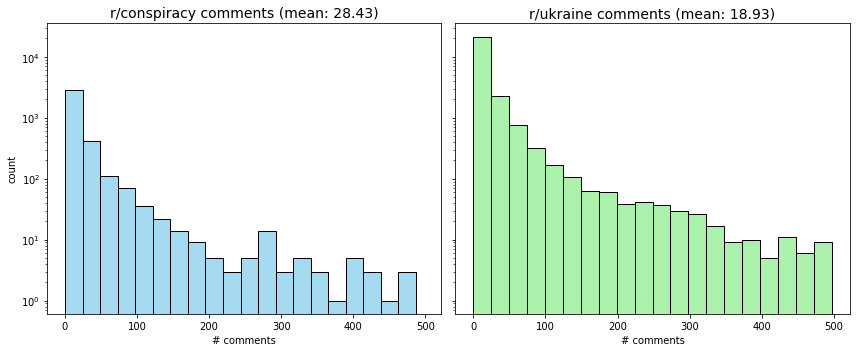

In [73]:
fig, ax = plt.subplots(1, 2, figsize=(12,5), sharey=True, sharex=True)
ax = ax.ravel()

mean_c = df_c_filt['num_comments_y'].mean()
sns.histplot(data=df_c_filt[df_c_filt['num_comments_y']<500], x='num_comments_y', ax = ax[0], bins=20, color='skyblue')
ax[0].set_title(f'r/conspiracy comments (mean: {round(mean_c, 2)})', fontsize=14)
ax[0].set_xlabel("# comments")
ax[0].set(ylabel='count')

mean_u = df_u_filt['num_comments_y'].mean()
sns.histplot(data=df_u_filt[df_u_filt['num_comments_y']<500], x='num_comments_y', ax = ax[1], bins=20, color="lightgreen")
ax[1].set_title(f'r/ukraine comments (mean: {round(mean_u, 2)})', fontsize=14)
ax[1].set_xlabel("# comments")

plt.yscale('log')
plt.tight_layout()
plt.savefig("./images/num_comments.png")

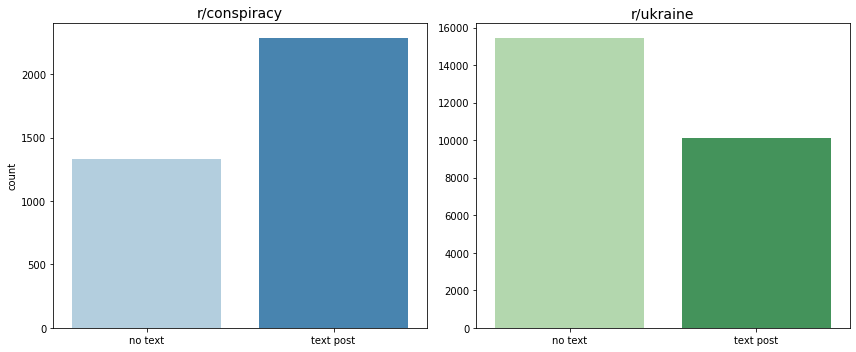

In [74]:
fig, ax = plt.subplots(1, 2, figsize=(12,5))
ax = ax.ravel()

sns.countplot(data=df_c_filt, x=df_c_filt['is_self'].astype(int), ax = ax[0], palette='Blues')
ax[0].set_xticklabels(['no text', 'text post'])
ax[0].set_title('r/conspiracy', fontsize=14)
ax[0].set_xlabel('')

sns.countplot(data=df_u_filt, x=df_u_filt['is_self'].astype(int), ax = ax[1], palette='Greens')
ax[1].set_xticklabels(['no text', 'text post'])
ax[1].set_title('r/ukraine', fontsize=14)
ax[1].set_ylabel('')
ax[1].set_xlabel('')

plt.tight_layout()
plt.savefig("./images/typeofpost")

In [75]:
def wordCount(string):
    return len(str(string).split())

In [76]:
df_c_filt['wordcount_title'] = df_c_filt['title_x'].apply(wordCount)
df_u_filt['wordcount_title'] = df_u_filt['title_x'].apply(wordCount)

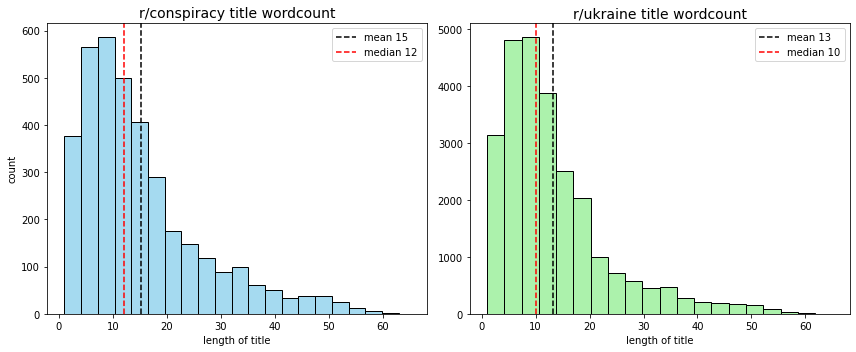

In [77]:
fig, ax = plt.subplots(1, 2, figsize=(12,5), sharex=True)
ax = ax.ravel()

mean_c = df_c_filt['wordcount_title'].mean()
median_c = df_c_filt['wordcount_title'].median()
sns.histplot(data=df_c_filt, x='wordcount_title', ax = ax[0], bins=20, color='skyblue')
ax[0].set_title('r/conspiracy title wordcount', fontsize=14)
ax[0].set_xlabel("length of title")
ax[0].set(ylabel='count')
ax[0].axvline(mean_c, ls='--', color='black')
ax[0].axvline(median_c, ls='--', color='red')
ax[0].legend(labels=[f'mean {round(mean_c)}', f'median {round(median_c)}'])

mean_u = df_u_filt['wordcount_title'].mean()
median_u = df_u_filt['wordcount_title'].median()
sns.histplot(data=df_u_filt, x='wordcount_title', ax = ax[1], bins=20, color='lightgreen')
ax[1].set_title('r/ukraine title wordcount', fontsize=14)
ax[1].set_xlabel("length of title")
ax[1].set_ylabel('')
ax[1].axvline(mean_u, ls='--', color='black')
ax[1].axvline(median_u, ls='--', color='red')
ax[1].legend(labels=[f'mean {round(mean_u)}', f'median {round(median_u)}'])

plt.tight_layout()
plt.savefig("./images/title_length.png")

In [78]:
df_c_filt['selftext'] = df_c_filt['selftext'].apply(str) 
df_c_self = df_c_filt.drop(df_c_filt[df_c_filt['selftext'].isin({"remove", "delete",  "nan"})].index)
df_c_self['wordcount_selftext'] = df_c_self['selftext'].apply(wordCount)
mean_c = df_c_self['wordcount_selftext'].mean()
median_c = df_c_self['wordcount_selftext'].median()
#IQR, q75 = calculateIQR(df_c_self, 'wordcount_selftext')
#extremeOutlier = q75 + 3*IQR
df_c_self = df_c_self.drop(df_c_self[df_c_self['wordcount_selftext'] > 500].index)

In [79]:
df_u_filt['selftext'] = df_u_filt['selftext'].apply(str) 
df_u_self = df_u_filt.drop(df_u_filt[df_u_filt['selftext'].isin({"remove", "delete",  "nan"})].index)
df_u_self['wordcount_selftext'] = df_u_self['selftext'].apply(wordCount)
mean_u = df_u_self['wordcount_selftext'].mean()
median_u = df_u_self['wordcount_selftext'].median()
#IQR, q75 = calculateIQR(df_u_self, 'wordcount_selftext')
#extremeOutlier = q75 + 3*IQR
df_u_self = df_u_self.drop(df_u_self[df_u_self['wordcount_selftext'] > 500].index)

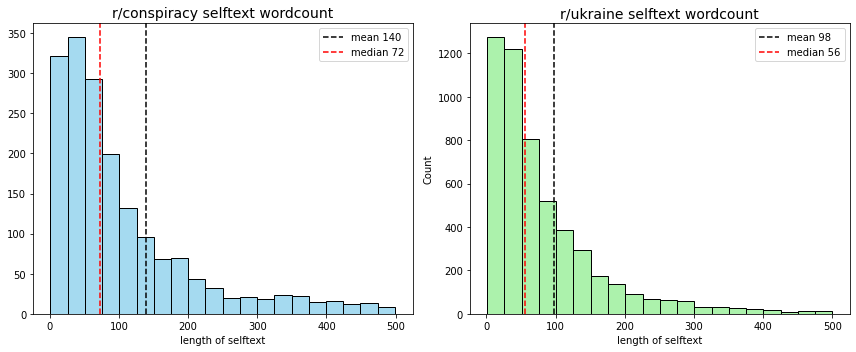

In [80]:
fig, ax = plt.subplots(1, 2, figsize=(12,5), sharex=True)
ax = ax.ravel()

sns.histplot(data=df_c_self, x='wordcount_selftext', ax = ax[0], bins=20, color='skyblue')
ax[0].set_title('r/conspiracy selftext wordcount', fontsize=14)
ax[0].set_xlabel("length of selftext")
ax[0].set(ylabel='count')
ax[0].axvline(mean_c, ls='--', color='black')
ax[0].axvline(median_c, ls='--', color='red')
ax[0].legend(labels=[f'mean {round(mean_c)}', f'median {round(median_c)}'])

sns.histplot(data=df_u_self, x='wordcount_selftext', ax = ax[1], bins=20, color='lightgreen')
ax[1].set_title('r/ukraine selftext wordcount', fontsize=14)
ax[1].set_xlabel("length of selftext")
ax[0].set(ylabel='')

ax[1].axvline(mean_u, ls='--', color='black')
ax[1].axvline(median_u, ls='--', color='red')
ax[1].legend(labels=[f'mean {round(mean_u)}', f'median {round(median_u)}'])

plt.tight_layout()
plt.savefig("./images/selftext_length.png")

In [81]:
from scipy import stats
import numpy as np
def calculateIQR(dataframe, column):
    IQR = stats.iqr(dataframe[column], interpolation = 'midpoint')
    q75, q25 = np.percentile(dataframe[column], [75 ,25])
    return IQR, q75

In [82]:
df_c_authors = df_c_filt.groupby('author_x', as_index=False).size()
df_u_authors = df_u_filt.groupby('author_x', as_index=False).size()

Text(0.5, 1.0, 'submissions per author')

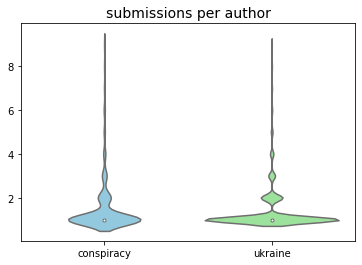

In [83]:
ax = sns.violinplot(data=[df_c_authors[df_c_authors['size']<10]['size'], df_u_authors[df_u_authors['size']<10]['size']], palette=["skyblue", "lightgreen"])
ax.set_xticklabels(['conspiracy','ukraine'])
ax.set_title("submissions per author", fontsize=14)

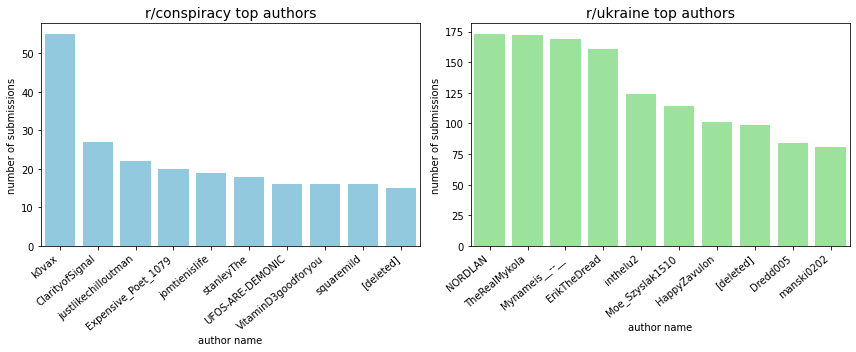

In [85]:
top_authors_u = df_u_authors.nlargest(10, 'size')
top_authors_c = df_c_authors.nlargest(10, 'size')

fig, ax = plt.subplots(1, 2, figsize=(12,5))
ax = ax.ravel()

sns.barplot(data=top_authors_c, x='author_x', y='size', ax = ax[0], color='skyblue')
ax[0].set_title('r/conspiracy top authors', fontsize=14)
ax[0].set_xlabel("author name")
ax[0].set_xticklabels(top_authors_c.author_x, rotation=40, ha='right')
ax[0].set(ylabel='number of submissions')

sns.barplot(data=top_authors_u, x='author_x', y='size', ax = ax[1], color='lightgreen')
ax[1].set_title('r/ukraine top authors', fontsize=14)
ax[1].set_xlabel("author name")
ax[1].set_xticklabels(top_authors_u.author_x, rotation=40, ha='right')
ax[1].set(ylabel='number of submissions')

plt.tight_layout()
plt.savefig("./images/top_authors.png")